In [1]:
%load_ext autoreload
%autoreload 2
import sys
extra_path = "/Users/iraklis/Public/iraklis7_linrg" # whatever individual directory it is
if extra_path not in sys.path:
    sys.path.append(extra_path)

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDRegressor
import plotly.express as px
#from pca_utils import plot_widget
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

import iraklis7_linrg.config as config

2026-01-16 13:18:23.654 | INFO     | iraklis7_linrg.config:<module>:19 - PROJ_ROOT path is: /Users/iraklis/Public/iraklis7_linrg


### Load the data

In [3]:
input_path: Path = config.RAW_DATA_DIR / config.DATASET

df = pd.read_csv(input_path)
df.head()
features = df.drop('Price', axis=1)
features.head

<bound method NDFrame.head of     Size(sq.ft)  Bedrooms  Bathrooms   Age
0         952.0       2.0        1.0  65.0
1        1244.0       3.0        1.0  64.0
2        1947.0       3.0        2.0  17.0
3        1725.0       3.0        2.0  42.0
4        1959.0       3.0        2.0  15.0
..          ...       ...        ...   ...
95       1224.0       2.0        2.0  12.0
96       1432.0       2.0        1.0  43.0
97       1660.0       3.0        2.0  19.0
98       1212.0       3.0        1.0  20.0
99       1050.0       2.0        1.0  65.0

[100 rows x 4 columns]>

In [ ]:
# Loading the PCA object
pca = PCA(n_components = 2) # Here we choose the number of components that we will keep.
X_pca = pca.fit_transform(features)
print(X_pca.shape)
df_pca = pd.DataFrame(X_pca, columns = ['principal_component_1','principal_component_2'])
df_pca.head()

PCA(n_components=2)
(100, 2)


,principal_component_1,principal_component_2
0,-462.091224,18.511411
1,-170.115594,22.468074
2,533.580926,-12.598977
3,311.188843,8.630992
4,545.613125,-14.395095


Text(0.5, 1.0, 'PCA decomposition')

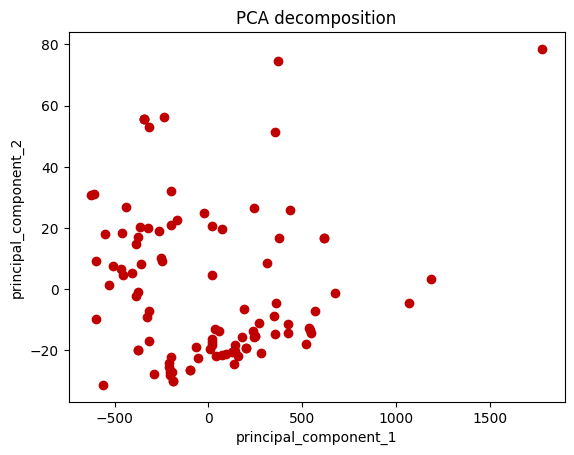

In [5]:
plt.scatter(df_pca['principal_component_1'],df_pca['principal_component_2'], color = "#C00000")
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2')
plt.title('PCA decomposition')

In [6]:
# pca.explained_variance_ration_ returns a list where it shows the amount of variance explained by each principal component.
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.99638489 0.00361254]
0.9999974292973253


In [7]:
X_reduced = pca.inverse_transform(X_pca)
X_reduced

array([[9.51999649e+02, 2.34857452e+00, 1.03898985e+00, 6.49991331e+01],
       [1.24400019e+03, 2.61742557e+00, 1.24291201e+00, 6.40011656e+01],
       [1.94700002e+03, 3.15003826e+00, 1.76729314e+00, 1.69994398e+01],
       [1.72500028e+03, 3.00795780e+00, 1.59408486e+00, 4.19996753e+01],
       [1.95900001e+03, 3.15605077e+00, 1.77714199e+00, 1.49994318e+01],
       [1.31399926e+03, 2.55394559e+00, 1.32910037e+00, 1.39988226e+01],
       [8.63999766e+02, 2.26934917e+00, 9.77009766e-01, 6.59992903e+01],
       [1.83599948e+03, 3.04686491e+00, 1.69005821e+00, 1.70003968e+01],
       [1.02600052e+03, 2.36080854e+00, 1.10696948e+00, 4.30017234e+01],
       [3.19399914e+03, 4.48908627e+00, 2.58248192e+00, 8.69991793e+01],
       [7.87999842e+02, 2.23469761e+00, 9.13634221e-01, 7.99993319e+01],
       [1.20000010e+03, 2.45569344e+00, 1.24753127e+00, 1.69982644e+01],
       [1.55699892e+03, 2.79009737e+00, 1.49518147e+00, 1.79983400e+01],
       [1.43000002e+03, 2.67719971e+00, 1.40531425e

In [9]:
pca_3 = PCA(n_components = 3)
X_t = pca_3.fit_transform(features)
df_pca_3 = pd.DataFrame(X_t,columns = ['principal_component_1','principal_component_2','principal_component_3'])
df_pca_3.head()

,principal_component_1,principal_component_2,principal_component_3
0,-462.091224,18.511411,-0.350742
1,-170.115594,22.468074,0.355037
2,533.580926,-12.598977,-0.124847
3,311.188843,8.630992,0.034589
4,545.613125,-14.395095,-0.131858


In [10]:
print(pca_3.explained_variance_ratio_)
print(sum(pca_3.explained_variance_ratio_))

[9.96384885e-01 3.61254423e-03 1.70041545e-06]
0.9999991297127757


In [11]:
X_reduced3 = pca_3.inverse_transform(X_t)
X_reduced3

array([[ 9.51999999e+02,  1.99976170e+00,  1.00226327e+00,
         6.50000023e+01],
       [ 1.24399983e+03,  2.97050998e+00,  1.28008834e+00,
         6.40002858e+01],
       [ 1.94700015e+03,  3.02587773e+00,  1.75422025e+00,
         1.69997492e+01],
       [ 1.72500024e+03,  3.04235677e+00,  1.59770673e+00,
         4.19995895e+01],
       [ 1.95900014e+03,  3.02491805e+00,  1.76333499e+00,
         1.49997585e+01],
       [ 1.31399984e+03,  1.97180312e+00,  1.26780646e+00,
         1.40002732e+01],
       [ 8.64000030e+02,  2.00534728e+00,  9.49212949e-01,
         6.59999482e+01],
       [ 1.83599959e+03,  2.92865541e+00,  1.67761190e+00,
         1.70006914e+01],
       [ 1.02599990e+03,  2.98185258e+00,  1.17235934e+00,
         4.30001759e+01],
       [ 3.19399969e+03,  3.94470638e+00,  2.52516404e+00,
         8.70005358e+01],
       [ 7.88000066e+02,  2.01156689e+00,  8.90140738e-01,
         7.99998879e+01],
       [ 1.20000047e+03,  2.08335383e+00,  1.20832755e+00,
      

In [20]:
pca_1 = PCA(n_components = 1).fit(features)
X_t = pca_1.transform(features)
df_pca_1 = pd.DataFrame(X_t,columns = ['principal_component_1'])
df_pca_1.head()

,principal_component_1
0,-462.091224
1,-170.115594
2,533.580926
3,311.188843
4,545.613125


In [21]:
print(pca_1.explained_variance_ratio_)
print(sum(pca_1.explained_variance_ratio_))

[0.99638489]
0.996384885070925


In [15]:
features_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PROC_FEATURES
df2 = pd.read_csv(features_path)

features1 = df2.drop(['Bedrooms', 'Bathrooms', 'Age'], axis=1)
features2 = df2.drop(['Bedrooms', 'Bathrooms'], axis=1)
features3 = df2.drop(['Bedrooms'], axis=1)

#features = df2.drop(['Bedrooms', 'Bathrooms'], axis=1)
labels = df['Price']
#labels = df.drop(['Size(sq.ft)', 'Bedrooms', 'Bathrooms', 'Age'], axis=1)
print(features1.head())
print(labels.head())


   Size(sq.ft)
0    -1.120185
1    -0.411745
2     1.293850
3     0.755241
4     1.322964
0    271.5
1    300.0
2    509.8
3    394.0
4    540.0
Name: Price, dtype: float64


In [16]:
sgdr1 = SGDRegressor(max_iter=1000)
sgdr1.fit(features1, labels)
sgdr2 = SGDRegressor(max_iter=1000)
sgdr2.fit(features2, labels)
sgdr3 = SGDRegressor(max_iter=1000)
sgdr3.fit(features3, labels)

,"loss loss: str, default='squared_error'The loss function to be used. The possible values are 'squared_error','huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'The 'squared_error' refers to the ordinary least squares fit.'huber' modifies 'squared_error' to focus less on getting outlierscorrect by switching from squared to linear loss past a distance ofepsilon. 'epsilon_insensitive' ignores errors less than epsilon and islinear past that; this is the loss function used in SVR.'squared_epsilon_insensitive' is the same but becomes squared loss pasta tolerance of epsilon.More details about the losses formulas can be found in the:ref:`User Guide `.",'squared_error'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",'l2'
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"random_state random_state: int, RandomState instance, default=NoneUsed for shuffling the data, when ``shuffle`` is set to ``True``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None


In [17]:
b_norm = sgdr1.intercept_
w_norm = sgdr1.coef_

print(b_norm)
print(w_norm)

[362.19420293]
[89.12787728]


In [18]:
predictions1 = sgdr1.predict(features1)
predictions2 = sgdr2.predict(features2)
predictions3 = sgdr3.predict(features3) 

In [19]:
labels_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PROC_LABELS
predictions_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PREDICTIONS

df3 = pd.read_csv(labels_path)
print(df3.index)

new_df1 = pd.DataFrame(predictions1, columns=['PCA1_Price'])
new_df2 = pd.DataFrame(predictions2, columns=['PCA2_Price'])
new_df3 = pd.DataFrame(predictions3, columns=['PCA3_Price'])
new_df4 = pd.read_csv(predictions_path)


#df3.insert(0, 'AltPrice', predictions, False)
df3 = pd.concat([df3, new_df1, new_df2, new_df3, new_df4], axis=1)
df3['Diff1'] = abs(df3['Price'] - df3['PCA1_Price']) / df3['Price'] * 100
df3['Diff2'] = abs(df3['Price'] - df3['PCA2_Price']) / df3['Price'] * 100
df3['Diff3'] = abs(df3['Price'] - df3['PCA3_Price']) / df3['Price'] * 100
df3['Diff4'] = abs(df3['Price'] - df3['PCA4_Price']) / df3['Price'] * 100



print(df3)
print("Avg diff1: ", df3['Diff1'].mean())
print("Avg diff2: ", df3['Diff2'].mean())
print("Avg diff3: ", df3['Diff3'].mean())
print("Avg diff4: ", df3['Diff4'].mean())

RangeIndex(start=0, stop=100, step=1)
    Price  PCA1_Price  PCA2_Price  PCA3_Price  PCA4_Price      Diff1  \
0   271.5  262.354454  234.537562  237.457234  248.773844   3.368525   
1   300.0  325.496268  291.852913  308.872166  295.632376   8.498756   
2   509.8  477.512345  496.637835  480.026657  485.481904   6.333396   
3   394.0  429.507268  416.753129  388.131505  389.626309   9.011997   
4   540.0  480.107214  501.927556  486.000134  491.617228  11.091257   
..    ...         ...         ...         ...         ...        ...   
95  329.0  321.171486  365.921998  314.798011  332.729188   2.379488   
96  388.0  366.149216  359.246623  386.427768  408.888643   5.631645   
97  390.0  415.451728  438.780335  408.256839  406.150558   6.526084   
98  356.0  318.576617  351.644716  369.467892  351.823959  10.512186   
99  257.8  283.545885  253.270807  260.904657  274.858244   9.986767   

        Diff2      Diff3     Diff4  
0   13.614158  12.538772  8.370592  
1    2.715696   2.95738

In [38]:
features_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PROC_FEATURES
labels_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PROC_LABELS
dfX = pd.read_csv(features_path)
dfY = pd.read_csv(labels_path)
res = dfY.copy()
comps = 5

for i in range(1, comps):
    print("Iteration: ", i)
    pca_X = PCA(n_components=i)
    XX_pca = pca_X.fit_transform(dfX)

    model = SGDRegressor(max_iter=1000)
    model.fit(XX_pca, dfY)

    predictionsX = model.predict(XX_pca)
    dfZ = pd.DataFrame(predictionsX, columns=[f'PCA{i}_Price'])

    res = pd.concat([res, dfZ], axis=1)
    res[f'Diff{i}'] = abs(res['Price'] - res[f'PCA{i}_Price']) / res['Price'] * 100
print(res)

for i in range(1, comps):
    print(f"Avg diff{i}: ", res[f'Diff{i}'].mean())

Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
    Price  PCA1_Price      Diff1  PCA2_Price      Diff2  PCA3_Price  \
0   271.5  266.573067   1.814708  250.535807   7.721618  242.895403   
1   300.0  326.296923   8.765641  285.856530   4.714490  296.108889   
2   509.8  457.051298  10.346940  477.045421   6.424986  470.002499   
3   394.0  428.006750   8.631155  414.103223   5.102341  402.546531   
4   540.0  458.955532  15.008235  481.684841  10.799104  475.004715   
..    ...         ...        ...         ...        ...         ...   
95  329.0  369.042470  12.170963  423.540282  28.735648  399.830408   
96  388.0  312.854108  19.367498  325.491763  16.110370  321.739717   
97  390.0  435.127018  11.571030  453.501856  16.282527  446.177060   
98  356.0  346.641243   2.628864  367.576034   3.251695  385.897019   
99  257.8  273.707483   6.170474  257.272557   0.204594  249.603315   

        Diff3  PCA4_Price     Diff4  
0   10.535763  248.611705  8.430311  
1    1.297037  

/Users/iraklis/Public/iraklis7_linrg/lib/python3.14/site-packages/sklearn/utils/validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/iraklis/Public/iraklis7_linrg/lib/python3.14/site-packages/sklearn/utils/validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/iraklis/Public/iraklis7_linrg/lib/python3.14/site-packages/sklearn/utils/validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/iraklis/Public/iraklis7_linrg/lib/python3.14/site-packages/sklearn/utils/validation.py:1352: DataConversionWarning: A column-v